TAREA 1: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas).

In [2]:
# Importamos los módulos necesarios
import cv2
import numpy as np
import matplotlib.pyplot as plt

(0.0, 512.0)

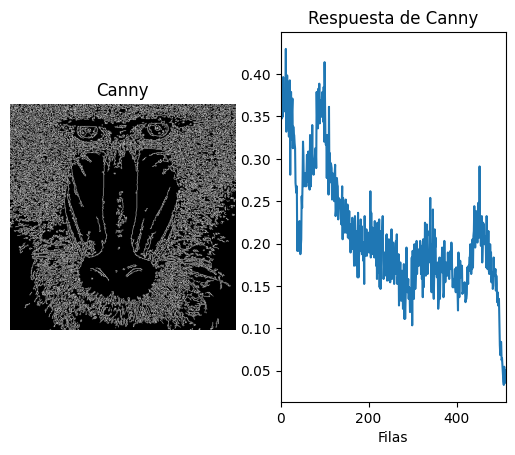

In [3]:
# Leemos la imagen del archivo
mandril = cv2.imread('mandril.jpg')

# Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(mandril, cv2.COLOR_BGR2GRAY)

# Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

# El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
# Cuenta el número de píxeles blancos (255) por filas
# Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
rows = row_counts / (255 * canny.shape[0])


#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

TAREA 1.1: Determinar el máximo para filas y columnas (uno para cada).

In [4]:
# Determinamos la fila con el valor máximo de píxeles blancos
max_rows = np.argmax(rows)
print("El máximo de la respuesta de Canny es: ", max_rows)

# Determinar el número de píxeles blancos en la fila con el valor máximo
max_value_row = row_counts[max_rows]
print("El número de píxeles blancos en la fila con el valor máximo es: ", max_value_row)

El máximo de la respuesta de Canny es:  12
El número de píxeles blancos en la fila con el valor máximo es:  [56100]


In [5]:
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

# Determinar la columna con el valor máximo de píxeles blancos
max_cols = np.argmax(col_counts)
print("La columna con el valor máximo de píxeles blancos es: ", max_cols)

# Determinar el número de píxeles blancos en la columna con el valor máximo
max_value_col = col_counts[0][max_cols]
print("El número de píxeles blancos en la columna con el valor máximo es: ", max_value_col)

La columna con el valor máximo de píxeles blancos es:  104
El número de píxeles blancos en la columna con el valor máximo es:  47685


TAREA 1.2: Muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.

In [6]:
# Mostramos el número de filas con un número de píxeles blancos superior al 95% del máximo
print("Número de filas con un número de píxeles blancos superior al 95% del máximo: ", np.sum(row_counts > max_value_row * 0.95))

# Averiguamos las filas exactas tienen un número de píxeles blancos superior al 95% del máximo
rows_95 = np.where(row_counts > max_value_row * 0.95)
print("Filas con un número de píxeles blancos superior al 95% del máximo: ", rows_95[0])

# Mostramos el número de píxeles blanco de dichas filas
print("Número de píxeles blanco de dichas filas: ", row_counts[rows_95])

Número de filas con un número de píxeles blancos superior al 95% del máximo:  2
Filas con un número de píxeles blancos superior al 95% del máximo:  [ 12 100]
Número de píxeles blanco de dichas filas:  [56100 54060]


TAREA 2: Aplicar umbralizado a la imagen resultante de Sobel y realizar el conteo por filas y columnas.

'\n# Aplicar umbralización a la imagen resultante de Sobel\n_, umbralizada = cv2.threshold(canny, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)\n\n# Mostrar la imagen umbralizada\nplt.figure()\nplt.axis("off")\n\n# Realizar el conteo por filas de la imagen umbralizada\nrow_counts = cv2.reduce(umbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)\nrows = row_counts / (255 * umbralizada.shape[0])\nprint("Número de píxeles blancos por fila: ", rows)\n\n# Realizar el conteo por columnas de la imagen umbralizada\ncol_counts = cv2.reduce(umbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)\ncols = col_counts[0] / (255 * umbralizada.shape[1])\nprint("Número de píxeles blancos por columna: ", cols)'

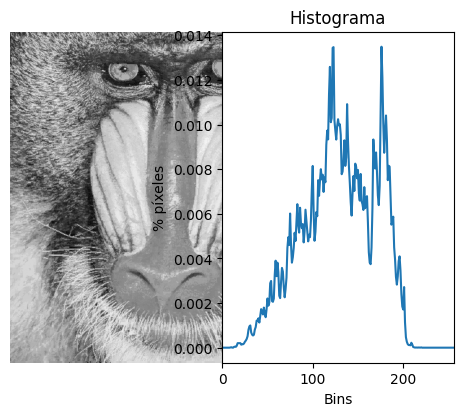

In [9]:

# Aplicar umbralización a la imagen resultante de Sobel
_, umbralizada = cv2.threshold(canny, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen umbralizada
plt.figure()
plt.axis("off")

# Realizar el conteo por filas de la imagen umbralizada
row_counts = cv2.reduce(umbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts / (255 * umbralizada.shape[0])
print("Número de píxeles blancos por fila: ", rows)

# Realizar el conteo por columnas de la imagen umbralizada
col_counts = cv2.reduce(umbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * umbralizada.shape[1])
print("Número de píxeles blancos por columna: ", cols)

TAREA 2.1: Calcular los máximos por filas y columnas, y determinar las filas y columnas por encima del 0.95*máximo. Remarcar con alguna primitiva gráfica dichas filas y columnas sobre la imagen.

TAREA 2.2: ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?